In [125]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [126]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 90)

In [127]:
cols_loaded = pd.read_csv('columns.csv', header=None)

In [128]:
col_types = cols_loaded.set_index(0).rename(columns={1:'index1'}).to_dict()

In [129]:
X_train = pd.read_csv('train_prep.csv', header=None)
X_train.columns =  list(col_types['index1'].keys())
X_train.astype(col_types['index1'])
X_test = pd.read_csv('validation_prep.csv', header=None)
X_test.columns =  list(col_types['index1'].keys())
X_test.astype(col_types['index1'])

,SalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,12.524421,13.449359,10.851912,0.000000,2,4,0,3,0,0.000000,0.000000,5,5,0,0,2,697.0,1,2,2,4,0.000000,2,2,9,10,0,2,1,1,2,6,2,2,2,2,1,1966.0,14.484354,0,1,4,7,1424,1,2,3,0,22.713138,1,5.817080,0,0.000000,13,3,0.000000,2,4,0.000000,10,7,8.473163,6,6,2,11.28916,2,4,0,2,8,0.000000,1,12,697.0,0,10.679538,1966,1966,0
1,11.877576,14.213968,0.000000,0.000000,2,4,2,4,4,0.000000,0.000000,6,6,0,0,4,0.0,1,1,2,4,0.000000,4,3,9,10,4,4,2,3,2,6,2,4,2,4,5,1977.0,14.213968,0,1,4,2,779,2,3,3,0,19.189158,4,5.684507,3,0.000000,15,2,9.178051,1,4,0.000000,1,20,0.000000,4,5,2,0.00000,3,0,1,4,8,0.000000,1,0,0.0,0,0.000000,1977,1977,1
2,11.849405,12.382690,0.000000,0.000000,2,2,1,3,1,10.337416,0.000000,0,5,1,0,3,75.0,1,2,2,4,0.000000,1,3,6,6,4,5,0,1,1,6,1,4,1,4,1,1958.0,12.382690,0,1,4,7,970,1,3,3,0,20.023862,4,6.098626,3,0.000000,4,3,6.751853,1,4,0.000000,5,12,0.000000,4,6,2,0.00000,3,0,3,4,3,0.000000,1,10,588.0,0,0.000000,1958,1958,0
3,12.072547,12.462556,0.000000,0.000000,2,3,0,3,0,11.393133,6.512196,0,3,0,1,2,266.0,1,2,2,4,0.000000,4,3,12,13,4,5,0,2,2,6,2,4,1,4,1,1977.0,12.462556,0,1,4,2,926,1,0,3,0,21.707788,0,6.221214,0,0.000000,5,3,0.000000,2,4,0.000000,5,14,0.000000,5,5,2,0.00000,3,0,1,0,8,0.000000,1,10,1126.0,0,7.873203,1977,1977,2
4,11.940400,12.703313,0.000000,0.000000,2,2,2,3,0,12.359144,0.000000,2,5,2,0,2,0.0,1,1,2,4,0.000000,4,3,9,10,4,4,2,1,0,6,2,4,2,4,5,1979.0,12.703313,2,1,4,6,189,2,3,0,0,18.501410,4,5.802739,3,0.000000,15,3,8.823108,3,4,0.000000,8,20,0.000000,4,5,2,0.00000,3,0,1,2,8,0.000000,1,10,1086.0,0,7.020909,1979,1979,3
5,12.739641,12.934877,12.377472,0.000000,2,3,0,3,1,12.580152,0.000000,2,5,1,0,2,138.0,1,2,2,4,8.274266,4,2,13,7,4,4,1,2,2,6,3,4,1,4,1,1993.0,14.784658,1,1,0,5,719,1,2,3,0,20.085156,4,6.574447,3,0.000000,10,3,10.954955,1,4,0.000000,10,15,7.538898,4,7,2,0.00000,3,0,3,4,8,0.000000,1,13,1311.0,0,8.604063,1993,1994,2
6,11.925042,10.740974,10.740974,0.000000,1,2,4,3,3,0.000000,0.000000,5,5,0,0,2,600.0,1,2,2,4,0.000000,4,2,8,8,4,5,0,2,2,6,2,4,1,4,5,2004.0,12.645909,1,1,0,5,604,1,2,3,0,15.686252,4,4.492018,3,0.000000,2,1,0.000000,2,4,0.000000,8,21,7.774945,4,7,2,0.00000,3,0,1,4,8,0.000000,1,8,600.0,0,0.000000,2004,2005,4
7,12.211065,13.234258,0.000000,0.000000,2,3,0,3,0,3.530419,0.000000,2,5,0,0,2,1450.0,1,2,2,4,0.000000,4,2,12,13,4,5,0,2,2,6,3,4,0,4,1,2007.0,13.234258,0,1,0,2,931,1,2,1,0,19.425328,4,6.047664,0,0.000000,5,3,0.000000,2,4,0.000000,9,23,3.701973,4,8,2,0.00000,3,0,1,4,8,0.000000,1,11,1466.0,0,6.654950,2007,2007,3
8,11.589896,11.821770,9.945514,0.000000,2,3,0,3,3,10.897674,0.000000,4,5,0,0,3,0.0,1,2,2,4,7.020909,4,3,8,8,4,5,0,1,1,6,1,4,2,4,4,1994.0,12.959182,1,1,2,0,558,1,3,2,1,20.271002,4,5.684507,3,0.000000,9,0,0.000000,2,4,0.000000,11,9,5.248357,5,4,2,0.00000,3,0,1,4,0,0.000000,1,11,637.0,0,0.000000,1920,1950,0
9,12.524530,13.833806,0.000000,0.000000,2,3,0,3,1,0.000000,0.000000,5,5,0,0,2,1753.0,1,2,2,4,0.000000,4,2,12,13,4,4,1,2,2,6,3,4,1,4,1,2001.0,13.833806,0,1,0,2,1319,1,2,3,0,21.476225,1,5.968981,1,0.000000,5,3,7.848990,1,4,0.000000,10,5,7.483296,4,8,2,0.00000,3,0,3,4,8,0.000000,1,11,1753.0,0,8.081455,2001,2002,0


In [130]:
test = pd.read_csv('test_prep.csv', dtype=col_types['index1'])

In [142]:
test_ID = test['Id']
test.drop(['Id', 'SalePrice'], inplace=True, axis=1)
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,11.818680,0.000000,0.0,2,2,0,3,3,10.105326,7.397498,4,3,0,0,3,270.0,1,1,2,4,0.0,4,3,12,13,2,5,0,1,1,6,1,4,2,4,1,1961.0,11.818680,0,1,4,2,1,3,3,0,20.479373,4,6.221214,3,0.0,5,2,0.000000,2,4,0.000000,8,12,0.000000,5,5,2,0.0,3,0,1,4,8,7.020909,1,9,882.0,0,7.338607,1961,1961,4
1,12.943735,0.000000,0.0,2,3,0,3,3,11.901094,0.000000,0,5,0,0,3,406.0,1,2,2,4,0.0,4,3,13,14,4,5,0,1,1,6,1,4,2,4,1,1958.0,12.943735,1,1,4,2,1,2,3,0,21.327220,0,6.244956,0,0.0,5,3,6.808145,1,0,20.777526,8,12,4.792130,5,6,2,0.0,3,0,3,4,8,0.000000,1,10,1329.0,0,9.672623,1958,1958,4
2,11.916131,11.151348,0.0,2,3,0,3,3,11.476685,0.000000,2,5,0,0,2,137.0,1,2,2,4,0.0,4,3,12,13,2,4,1,2,2,6,2,4,0,4,1,1997.0,13.551272,1,1,2,5,1,3,3,0,21.196905,4,6.073289,0,0.0,10,3,0.000000,2,4,0.000000,5,8,4.697012,4,5,2,0.0,3,0,1,4,8,0.000000,1,10,928.0,0,8.232627,1997,1998,4
3,11.910125,11.062536,0.0,2,3,0,3,3,10.749651,0.000000,2,5,0,0,3,324.0,1,2,2,4,0.0,4,3,12,13,4,2,1,2,2,6,2,4,0,4,1,1998.0,13.504453,1,1,0,5,1,2,3,0,19.865444,4,6.172972,0,0.0,10,3,3.858807,1,4,0.000000,8,8,4.792130,5,6,2,0.0,3,0,1,4,8,0.000000,1,11,926.0,0,9.459637,1998,1998,4
4,12.833625,0.000000,0.0,2,2,4,3,3,8.720170,0.000000,0,5,0,0,2,1017.0,1,2,2,4,0.0,4,2,6,6,4,5,0,2,2,6,2,4,1,4,1,1992.0,12.833625,0,1,0,2,1,2,1,0,17.257255,4,5.093857,0,0.0,0,3,0.000000,2,4,0.000000,0,22,6.268453,4,8,2,0.0,3,0,1,4,8,7.397498,1,9,1280.0,0,0.000000,1992,1992,4


In [132]:
y_train = X_train['SalePrice']
X_train.drop(['Id', 'SalePrice'], inplace=True, axis=1)
y_test = X_test['SalePrice']
X_test.drop(['Id', 'SalePrice'], inplace=True, axis=1)
# cols = list(train)
# print(cols)
# cols.insert(0, cols.pop(cols.index('SalePrice')))
# train = train.loc[:, cols]


In [151]:
xgb1 = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=100, objective='reg:squarederror', silent=0)
'''
xgb1 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4957, eta=0.04807, gamma=0.0401,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1.4283, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_round=971, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=0, subsample=0.6898, verbosity=1)
'''

"\nxgb1 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n       colsample_bynode=1, colsample_bytree=0.4957, eta=0.04807, gamma=0.0401,\n       importance_type='gain', learning_rate=0.1, max_delta_step=0,\n       max_depth=5, min_child_weight=1.4283, missing=None, n_estimators=100,\n       n_jobs=1, nthread=None, num_round=971, objective='reg:linear',\n       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,\n       seed=None, silent=0, subsample=0.6898, verbosity=1)\n"

In [152]:
xgb1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_round=100, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=0, subsample=0.7, verbosity=1)

In [153]:
xgb1.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:10.378	validation_1-rmse:10.3836
[1]	validation_0-rmse:9.34319	validation_1-rmse:9.3488
[2]	validation_0-rmse:8.4113	validation_1-rmse:8.41695
[3]	validation_0-rmse:7.57471	validation_1-rmse:7.58041
[4]	validation_0-rmse:6.82081	validation_1-rmse:6.82657
[5]	validation_0-rmse:6.14167	validation_1-rmse:6.14749
[6]	validation_0-rmse:5.53078	validation_1-rmse:5.53546
[7]	validation_0-rmse:4.98139	validation_1-rmse:4.98745
[8]	validation_0-rmse:4.48635	validation_1-rmse:4.49349
[9]	validation_0-rmse:4.04029	validation_1-rmse:4.04638
[10]	validation_0-rmse:3.63972	validation_1-rmse:3.64699
[11]	validation_0-rmse:3.27988	validation_1-rmse:3.2869
[12]	validation_0-rmse:2.95585	validation_1-rmse:2.96333
[13]	validation_0-rmse:2.66409	validation_1-rmse:2.67288
[14]	validation_0-rmse:2.40123	validation_1-rmse:2.41079
[15]	validation_0-rmse:2.16438	validation_1-rmse:2.17381
[16]	validation_0-rmse:1.95104	validation_1-rmse:1.96089
[17]	validation_0-rmse:1.75919	validation_1-r

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:0.129371	validation_1-rmse:0.166716
[47]	validation_0-rmse:0.122553	validation_1-rmse:0.161548
[48]	validation_0-rmse:0.116083	validation_1-rmse:0.156292
[49]	validation_0-rmse:0.110856	validation_1-rmse:0.151721
[50]	validation_0-rmse:0.10613	validation_1-rmse:0.147971
[51]	validation_0-rmse:0.102071	validation_1-rmse:0.14479
[52]	validation_0-rmse:0.098401	validation_1-rmse:0.142143
[53]	validation_0-rmse:0.095565	validation_1-rmse:0.14062
[54]	validation_0-rmse:0.092922	validation_1-rmse:0.138373
[55]	validation_0-rmse:0.09067	validation_1-rmse:0.137056
[56]	validation_0-rmse:0.088353	validation_1-rmse:0.13579
[57]	validation_0-rmse:0.086311	validation_1-rmse:0.134215
[58]	validation_0-rmse:0.084909	validation_1-rmse:0.133501
[59]	validation_0-rmse:0.083306	validation_1-rmse:0.132702
[60]	validation_0-rmse:0.081472	validation_1-rmse:0.132272
[61]	validation_0-rmse:0.08029	validation_1-rmse:0.130981
[62]	validation_0-rmse:0.079343	validation_1-rmse:0.130419
[63

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_round=100, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=0, subsample=0.7, verbosity=1)

In [154]:
eval_result = xgb1.evals_result()

In [155]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [156]:
print(training_rounds)

range(0, 100)


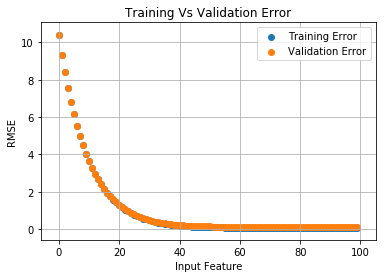

In [157]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

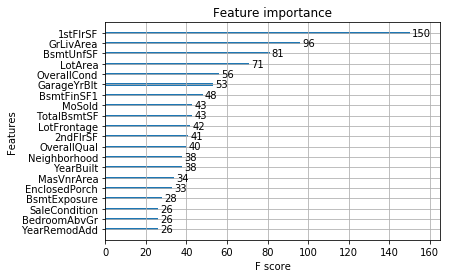

In [158]:
xgb.plot_importance(xgb1, max_num_features=20)

In [159]:
results = xgb1.predict(test)

In [160]:
results

array([11.677662, 11.939195, 12.1405  , ..., 11.960266, 11.711354,
       12.322577], dtype=float32)

In [161]:
predictions = np.expm1(results)

In [162]:
predictions

array([117907.234, 153152.3  , 187305.22 , ..., 156413.7  , 121947.516,
       224711.6  ], dtype=float32)

In [163]:
output = pd.DataFrame(test_ID)

In [164]:
output['SalePrice'] = predictions

In [165]:
output.to_csv('submission.csv', index=False)